# Using VGG16

In [2]:
import numpy as np
from keras.applications import vgg16
from keras.preprocessing import image

In [3]:
model = vgg16.VGG16(weights='imagenet')

553467096/553467096 [==============================] - 59s 0us/step


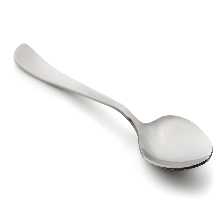

In [5]:
img = image.load_img('images/spoon.jpeg', target_size = (224,224))
img

In [7]:
# Convert to Numpy array
arr = image.img_to_array(img)
arr.shape
# 224x224 pixels and 3 for RGB values

(224, 224, 3)

In [9]:
# Expand Dimension - change to (1,224,224,3) because it expects 4Dims
arr = np.expand_dims(arr, axis=0)
arr.shape

(1, 224, 224, 3)

In [11]:
# Preprocessing
arr = vgg16.preprocess_input(arr)
arr

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [12]:
# Predict
preds = model.predict(arr)
preds
# These are the PROBABILITIES that our image corresponds to each image in imagenet

1/1 [==============================] - 0s 349ms/step


array([[8.44572625e-08, 3.89304546e-07, 3.81986638e-07, 2.99429735e-06,
        3.04706391e-05, 1.56404960e-04, 1.96297315e-05, 5.69106575e-08,
        1.55567932e-07, 2.09416520e-08, 2.18210801e-07, 8.64055352e-08,
        1.40145872e-07, 1.38308997e-06, 2.69006417e-08, 4.38312711e-08,
        1.01769115e-06, 1.59495599e-07, 2.74518726e-07, 6.50163599e-07,
        1.09401935e-06, 7.74871580e-07, 5.44523289e-08, 8.13308105e-08,
        4.53290170e-08, 8.52786783e-08, 4.27181135e-08, 9.65318065e-08,
        2.15969877e-07, 1.06834058e-07, 2.91653048e-08, 4.16022736e-08,
        3.74264282e-08, 8.28797226e-08, 2.43751856e-07, 5.07891436e-08,
        1.69841954e-07, 1.09263716e-07, 1.37065314e-07, 3.46905225e-08,
        5.66830295e-07, 6.84126036e-08, 4.47843469e-08, 5.61312419e-08,
        5.66270764e-08, 7.42564676e-09, 9.62566702e-08, 1.42699449e-07,
        4.12456069e-09, 1.75292647e-09, 1.59966067e-08, 9.13648080e-07,
        1.57508725e-06, 2.62329718e-06, 2.34180018e-08, 9.452119

In [15]:
# Predictions for top 5
vgg16.decode_predictions(preds, top=5)
# Cool! It predicts that there is a 74% chance that it's a ladle
# Keep in mind that stainless steel spoon is NOT one of the categories
# So that's pretty good..

[[('n03633091', 'ladle', 0.7431103),
  ('n04597913', 'wooden_spoon', 0.1118668),
  ('n04270147', 'spatula', 0.04612671),
  ('n04332243', 'strainer', 0.042931188),
  ('n03658185', 'letter_opener', 0.010525398)]]

## Test using another image
(This time it will be one of the imagenet categories)

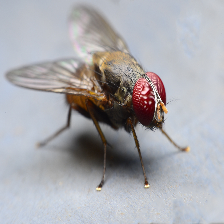

In [17]:
img2 = image.load_img('images/fly.jpeg', target_size=(224,224))
img2

In [19]:
arr2 = image.img_to_array(img2)
arr2 = np.expand_dims(arr2,axis=0)
arr2 = vgg16.preprocess_input(arr2)
preds2 = model.predict(arr2)
vgg16.decode_predictions(preds2, top=5)

1/1 [==============================] - 0s 135ms/step


[[('n02190166', 'fly', 0.997769),
  ('n02206856', 'bee', 0.0013271854),
  ('n02219486', 'ant', 0.00063573715),
  ('n02264363', 'lacewing', 9.114512e-05),
  ('n02256656', 'cicada', 2.9562478e-05)]]

In [20]:
# Dang nailed it. VGG16 is pretty powerful